pappus points:
1/3 2/3
7/4 5/4
12/19 15/19
   collinear:  True


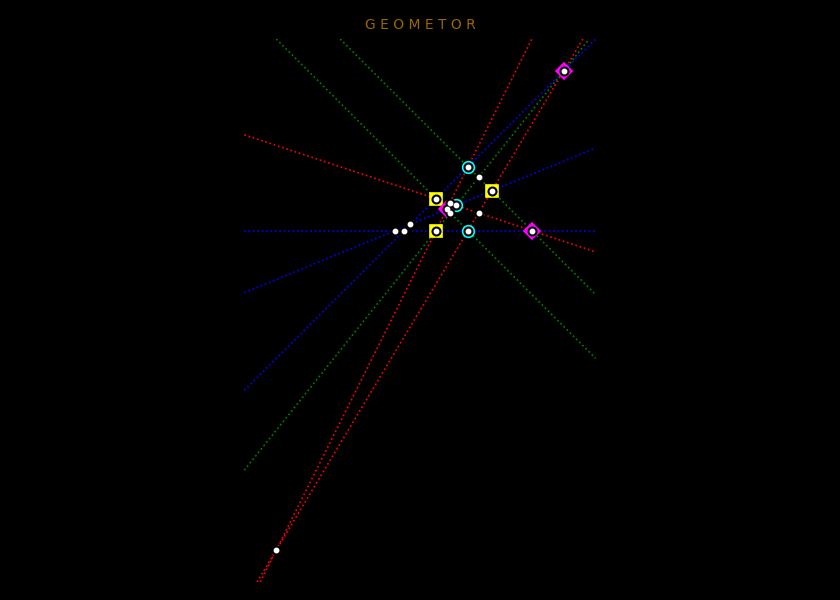

In [1]:
%run run.py
from geometor.pappus import *

%matplotlib widget

A.append( add_point( point(0, 0, classes=['A', 'square']) ) )
A.append( add_point( point(1, 0, classes=['A', 'circle']) ) )
line_a = line(A[0], A[1], classes=['blue']) 
add_element(line_a)
x_val = 3
A.append( add_point( point(x_val, 0, classes=['A', 'diamond']) ) )
line_a.pts.append(A[-1])

B.append( add_point( point(0, 1, classes=['B', 'square']) ) )
B.append( add_point( point(1, 2, classes=['B', 'circle']) ) )
# B.append( add_point( point(1, 1, classes=['B', 'square']) ) )
# B.append( add_point( point(0, 1, classes=['B', 'circle']) ) )
line_b = line(B[0], B[1], classes=['blue']) 
add_element(line_b)
x_val = 4
y_val = line_get_y(line_b, x_val)
B.append( add_point( point(x_val, y_val, classes=['B', 'diamond']) ) )
line_b.pts.append(B[-1])

# from itertools import permutations
# B_perms = list(permutations(B))

# B = B_perms[4]
# print(B)

set_meet(0, 1)
set_meet(1, 2)
set_meet(2, 0)
        
meets = get_pts_by_class('meet')

pappus_line = line(meets[0], meets[1], classes=['blue', 'pappus'])
if len(meets) == 3:
    pappus_line.pts.append(meets[2])
add_element(pappus_line)


limx, limy = get_limits_from_points(pts)
bounds = set_bounds(limx, limy)

plt_init(limx, limy)

plot_elements(elements, bounds)

plot_points(get_pts_by_class('circle'), **classes['circle'], add_to_cursors=False)
plot_points(get_pts_by_class('square'), **classes['square'], add_to_cursors=False)
plot_points(get_pts_by_class('diamond'), **classes['diamond'], add_to_cursors=False)
plot_points(pts)

print(f'pappus points:')
for pt in meets:
    print(pt.x, pt.y)
    
print('   collinear: ', sp.Point.is_collinear(*meets))



In [2]:
triangle_sq = polygon(get_pts_by_class('square'))
plot_polygon(triangle_sq, color='#FF03')

triangle_cir = polygon(get_pts_by_class('circle'))
plot_polygon(triangle_cir, color='#0FF3')

triangle_dia = polygon(get_pts_by_class('diamond'))
plot_polygon(triangle_dia, color='#F0F3')

AttributeError: 'Segment2D' object has no attribute 'vertices'

In [5]:
print('points: ', len(pts))
for pt in pts:
    print(f'{str(pt.x): >8} {str(pt.y): >8} {pt.classes} {[el.coefficients for el in pt.parents]}')
print('elements: ', len(elements))
for el in elements:
    print(f'{el.coefficients} {el.classes} ')

points:  17
       0        0 ['A', 'square'] []
       1        0 ['A', 'circle'] []
       3        0 ['A', 'diamond'] []
       0        1 ['B', 'square'] []
       1        2 ['B', 'circle'] []
      -1        0 [] [(-1, 1, -1), (0, 1, 0)]
       2        3 ['B', 'diamond'] []
     1/3      2/3 ['meet', 'diamond'] [(-1, -1, 1), (-2, 1, 0)]
       3        6 [] [(-3, 1, 3), (-2, 1, 0)]
     3/2      3/2 ['meet', 'square'] [(-2, -2, 6), (-3, 1, 3)]
     3/7      6/7 [] [(-1, -3, 3), (-2, 1, 0)]
     6/5      3/5 [] [(-1, -3, 3), (-3, 1, 3)]
     2/5      3/5 [] [(-3, 2, 0), (-1, -1, 1)]
     6/5      9/5 [] [(-3, 2, 0), (-2, -2, 6)]
    6/11     9/11 ['meet', 'circle'] [(-3, 2, 0), (-1, -3, 3)]
    -3/5        0 [] [(-5/6, 7/6, -1/2), (0, 1, 0)]
      -2       -1 [] [(-5/6, 7/6, -1/2), (-1, 1, -1)]
elements:  9
(0, 1, 0) ['blue']
(-1, 1, -1) ['blue']
(-2, 1, 0) ['red']
(-1, -1, 1) ['green']
(-3, 1, 3) ['red']
(-2, -2, 6) ['green']
(-1, -3, 3) ['red']
(-3, 2, 0) ['green']
(-5/6, 7/6, 

In [5]:
sp1 = spread(line_a, pappus_line)
if not math.isnan(sp1):
    print(sp1)


9/25


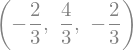

In [6]:
pappus_line.coefficients

In [9]:
from itertools import permutations
B_perms = list(permutations(B))
B_perms